# Intra-Cluster Light (ICL) profiles analysis in the Dark Energy Survey (DES)




In [5]:
import healpy as hp
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.rotator import Rotator
import kmeans_radec
from kmeans_radec import KMeans, kmeans_sample
import os
import os.path
import configparser
import sys
from astropy.table import Table

In [6]:
ini_file= 'redmapper_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rdmp=config.get('input', 'input_dir')
catalog=config.get('input', 'catalog_file')
flag_files_rdmp=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rdmp=config.get('output', 'save_dir')
grid_output_dir_rdmp=config.get('grid_output', 'save_dir')
rdmp=pyfits.open(catalog)[1].data
flags_rdmp=np.zeros(len(rdmp))+1
indices_rdmp=np.arange(len(rdmp))

### ICL jacknife profiles subtraction

In [7]:
str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;200)']
richness_dir = ['richness_20_30/',
                'richness_30_45/',
                'richness_45_60/',
                'richness_60_beyond/']

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


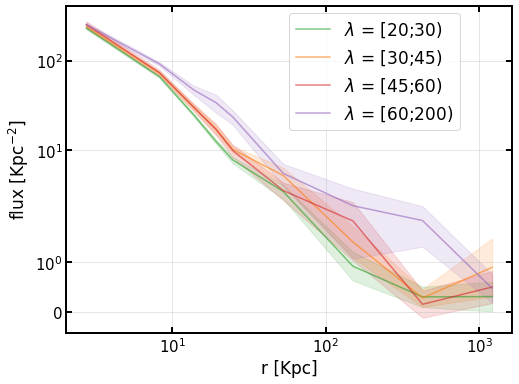

In [8]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


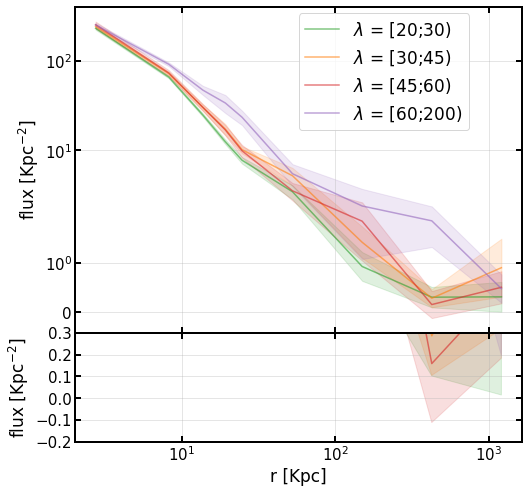

In [9]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,8))  
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax0.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xscale('log')


plt.grid(alpha=0.4)

colors = ['C2','C1','C3','C4']



    
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]

    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    
    r_red, mea_, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    

    #mag = 30 - 2.5 * np.log10(mea)
    #mag_up = 30 - 2.5 *np.log10(up)
    #mag_low = 30 - 2.5 * np.log10(low)
    
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label='')
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.ylim(-0.2, 0.3)

plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.locator_params(axis='y', nbins=5)
[ax1.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


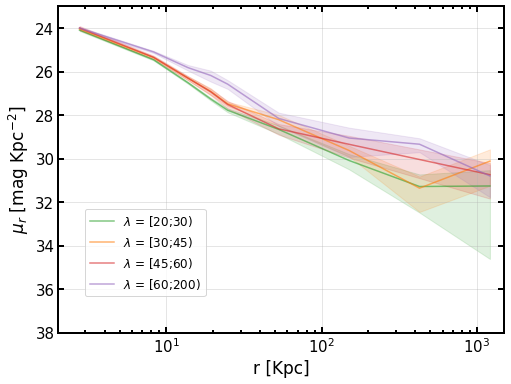

In [10]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


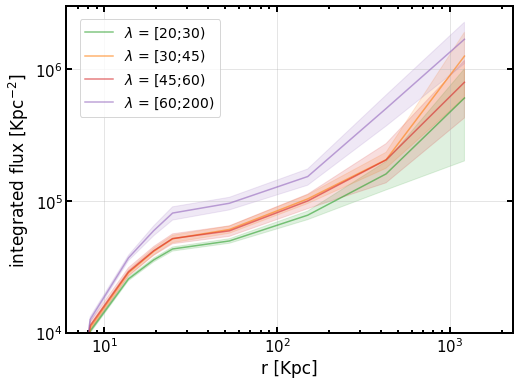

In [11]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']

zz = list(np.arange(4))
zz_up = list(np.arange(4))
zz_low = list(np.arange(4))
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')
    
    nn = [30,50,150,500]
    
    zz[i] = [np.interp(nn[0], r_red, mea),
             np.interp(nn[1], r_red, mea),
             np.interp(nn[2], r_red, mea),
             np.interp(nn[3], r_red, mea)]
    
    zz_up[i] = [np.interp(nn[0], r_red, up),
             np.interp(nn[1], r_red, up),
             np.interp(nn[2], r_red, up),
             np.interp(nn[3], r_red, up)]
    
    zz_low[i] = [np.interp(nn[0], r_red, low),
             np.interp(nn[1], r_red, low),
             np.interp(nn[2], r_red, low),
             np.interp(nn[3], r_red, low)]
    
    

plt.ylabel('integrated flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.yscale('symlog')
plt.xlim(6, 2.3e3)
plt.ylim(1e4, 3e6)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

In [12]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


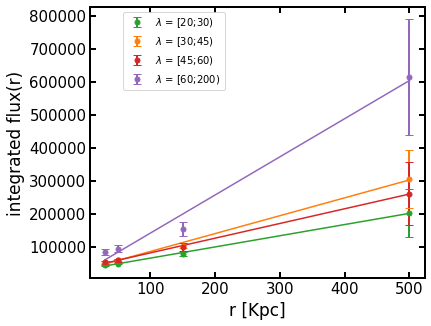

In [13]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;200)']
colors = ['C2','C1','C3','C4']

#shift = [-0.5,0.5,-0.5,0.5]

for i in range(4):
    
    #zz_ = np.insert(zz[i], 0, 0)
    #sub_zz = zz_[1:]-zz_[:-1]
    
    ulimit =np.array(zz_up[i])-np.array(zz[i])
    llimit =np.array(zz[i])-np.array(zz_low[i])
       
    #plt.plot(nn, sub_zz, 'o-', label=str_ngals[i], color=colors[i])
    #plt.plot(nn, zz[i], 'o-', label=str_ngals[i], color=colors[i])
    
    plt.errorbar(np.array(nn), zz[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    coef1 = np.polyfit(nn, zz[i], 1)
    plt.plot(nn, coef1[0]*np.array(nn)+coef1[1], '-', color=colors[i], label='')

plt.xlabel('r [Kpc]', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.1, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

In [14]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

rr=[25,37.5,52.5,100]
str_ngals = ['radius = 30 kpc',
             'radius = 50 kpc',
             'radius = 150 kpc',
            'radius = 500 kpc']


for i in range(4):
    
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '-', color=colors[i],label='')

plt.xlabel('$\lambda$', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### CENT RMEM clusters

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


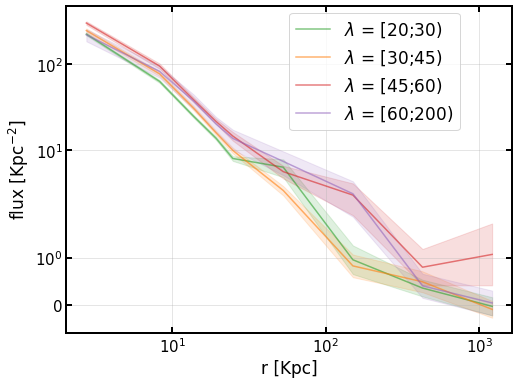

In [15]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


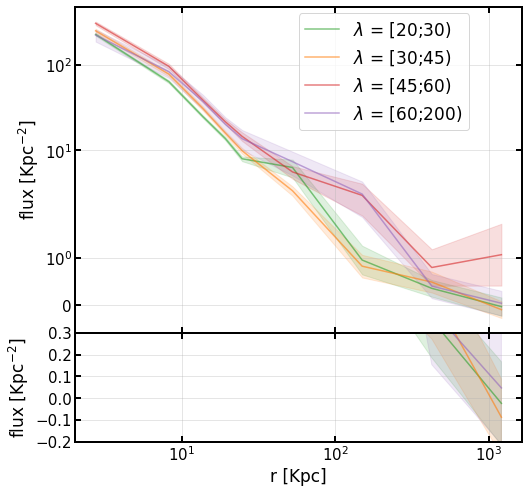

In [16]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,8))  
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax0.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xscale('log')


plt.grid(alpha=0.4)

colors = ['C2','C1','C3','C4']



    
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]

    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    
    r_red, mea_, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    

    #mag = 30 - 2.5 * np.log10(mea)
    #mag_up = 30 - 2.5 *np.log10(up)
    #mag_low = 30 - 2.5 * np.log10(low)
    
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label='')
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.ylim(-0.2, 0.3)

plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.locator_params(axis='y', nbins=5)
[ax1.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


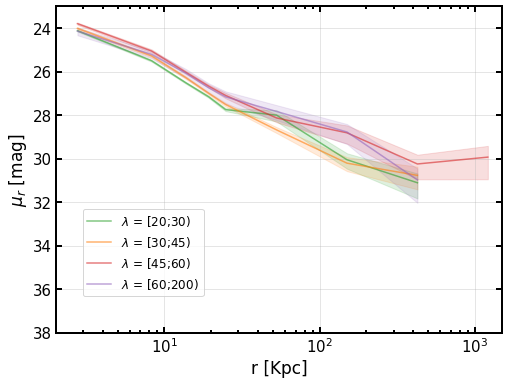

In [17]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


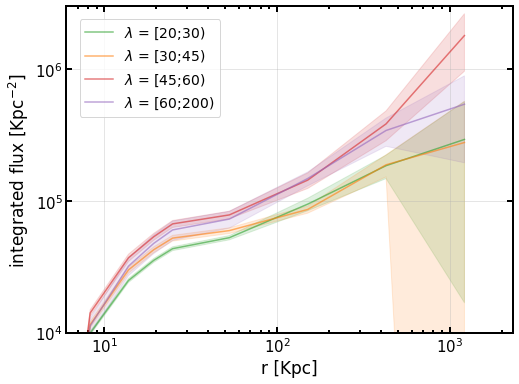

In [18]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']

zz = list(np.arange(4))
zz_up = list(np.arange(4))
zz_low = list(np.arange(4))
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')
    
    nn = [30,50,150,500]
    
    zz[i] = [np.interp(nn[0], r_red, mea),
             np.interp(nn[1], r_red, mea),
             np.interp(nn[2], r_red, mea),
             np.interp(nn[3], r_red, mea)]
    
    zz_up[i] = [np.interp(nn[0], r_red, up),
             np.interp(nn[1], r_red, up),
             np.interp(nn[2], r_red, up),
             np.interp(nn[3], r_red, up)]
    
    zz_low[i] = [np.interp(nn[0], r_red, low),
             np.interp(nn[1], r_red, low),
             np.interp(nn[2], r_red, low),
             np.interp(nn[3], r_red, low)]
    
    

plt.ylabel('integrated flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.yscale('symlog')
plt.xlim(6, 2.3e3)
plt.ylim(1e4, 3e6)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


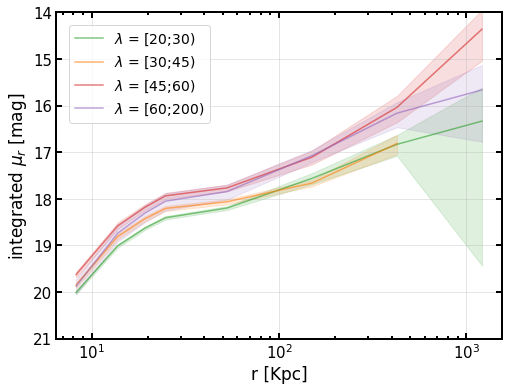

In [19]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


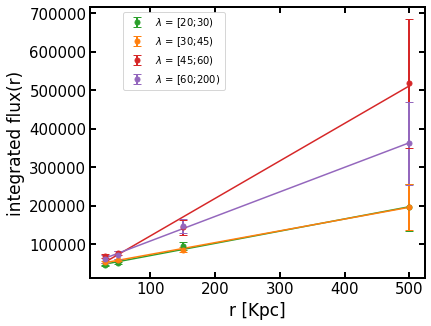

In [20]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;200)']
colors = ['C2','C1','C3','C4']

#shift = [-0.5,0.5,-0.5,0.5]

for i in range(4):
    
    #zz_ = np.insert(zz[i], 0, 0)
    #sub_zz = zz_[1:]-zz_[:-1]
    
    ulimit =np.array(zz_up[i])-np.array(zz[i])
    llimit =np.array(zz[i])-np.array(zz_low[i])
       
    #plt.plot(nn, sub_zz, 'o-', label=str_ngals[i], color=colors[i])
    #plt.plot(nn, zz[i], 'o-', label=str_ngals[i], color=colors[i])
    
    plt.errorbar(np.array(nn), zz[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    coef1 = np.polyfit(nn, zz[i], 1)
    plt.plot(nn, coef1[0]*np.array(nn)+coef1[1], '-', color=colors[i], label='')

plt.xlabel('r [Kpc]', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.1, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


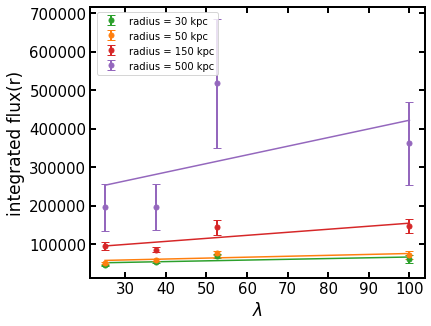

In [21]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

rr=[25,37.5,52.5,100]
str_ngals = ['radius = 30 kpc',
             'radius = 50 kpc',
             'radius = 150 kpc',
            'radius = 500 kpc']


for i in range(4):
    
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '-', color=colors[i],label='')

plt.xlabel('$\lambda$', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

### SMALL RMEM clusters

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


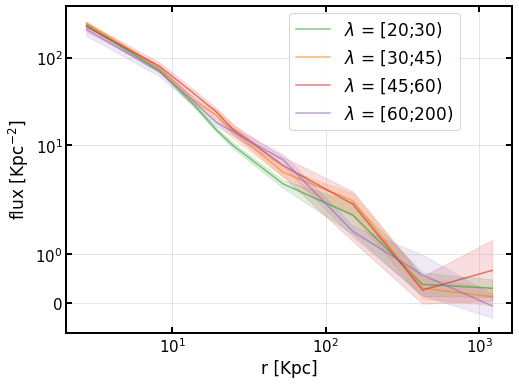

In [22]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


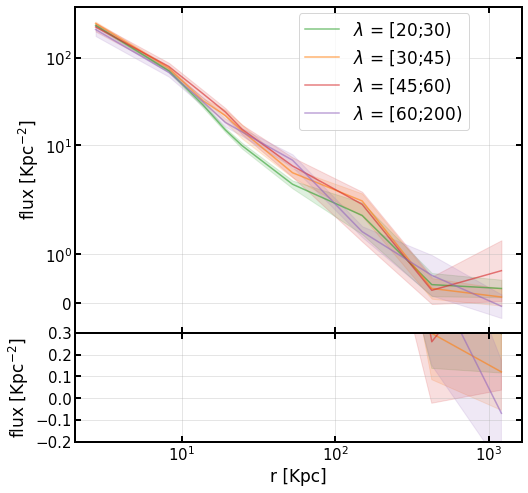

In [23]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,8))  
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax0.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xscale('log')


plt.grid(alpha=0.4)

colors = ['C2','C1','C3','C4']



    
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]

    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    
    r_red, mea_, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    

    #mag = 30 - 2.5 * np.log10(mea)
    #mag_up = 30 - 2.5 *np.log10(up)
    #mag_low = 30 - 2.5 * np.log10(low)
    
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label='')
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.ylim(-0.2, 0.3)

plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.locator_params(axis='y', nbins=5)
[ax1.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


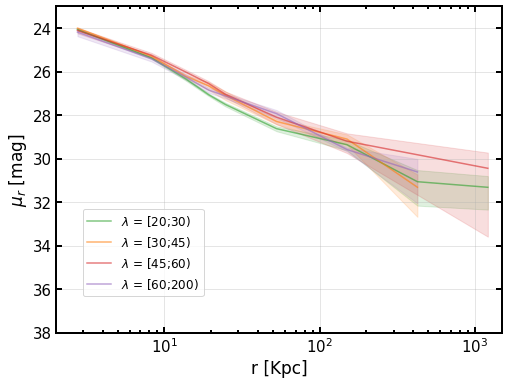

In [24]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


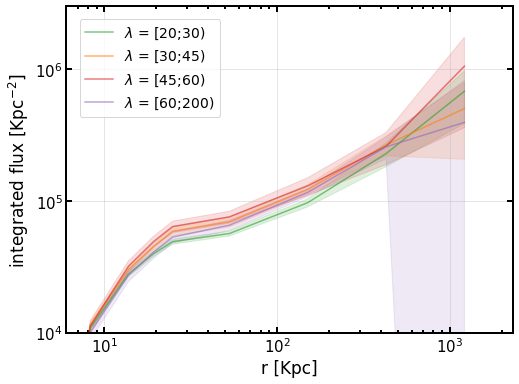

In [25]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']

zz = list(np.arange(4))
zz_up = list(np.arange(4))
zz_low = list(np.arange(4))
for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')
    
    nn = [30,50,150,500]
    
    zz[i] = [np.interp(nn[0], r_red, mea),
             np.interp(nn[1], r_red, mea),
             np.interp(nn[2], r_red, mea),
             np.interp(nn[3], r_red, mea)]
    
    zz_up[i] = [np.interp(nn[0], r_red, up),
             np.interp(nn[1], r_red, up),
             np.interp(nn[2], r_red, up),
             np.interp(nn[3], r_red, up)]
    
    zz_low[i] = [np.interp(nn[0], r_red, low),
             np.interp(nn[1], r_red, low),
             np.interp(nn[2], r_red, low),
             np.interp(nn[3], r_red, low)]
    
    

plt.ylabel('integrated flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.yscale('symlog')
plt.xlim(6, 2.3e3)
plt.ylim(1e4, 3e6)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


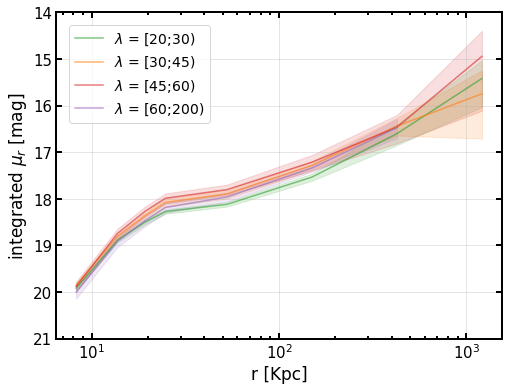

In [26]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


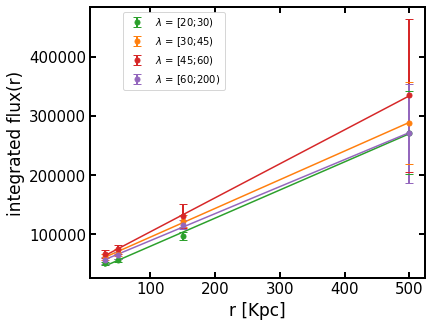

In [27]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;200)']
colors = ['C2','C1','C3','C4']

#shift = [-0.5,0.5,-0.5,0.5]

for i in range(4):
    
    #zz_ = np.insert(zz[i], 0, 0)
    #sub_zz = zz_[1:]-zz_[:-1]
    
    ulimit =np.array(zz_up[i])-np.array(zz[i])
    llimit =np.array(zz[i])-np.array(zz_low[i])
       
    #plt.plot(nn, sub_zz, 'o-', label=str_ngals[i], color=colors[i])
    #plt.plot(nn, zz[i], 'o-', label=str_ngals[i], color=colors[i])
    
    plt.errorbar(np.array(nn), zz[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    coef1 = np.polyfit(nn, zz[i], 1)
    plt.plot(nn, coef1[0]*np.array(nn)+coef1[1], '-', color=colors[i], label='')

plt.xlabel('r [Kpc]', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.1, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


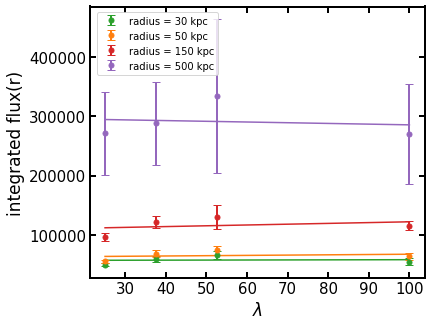

In [28]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

rr=[25,37.5,52.5,100]
str_ngals = ['radius = 30 kpc',
             'radius = 50 kpc',
             'radius = 150 kpc',
            'radius = 500 kpc']


for i in range(4):
    
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '-', color=colors[i],label='')

plt.xlabel('$\lambda$', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

### Comparison between UP and LOW rmem

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


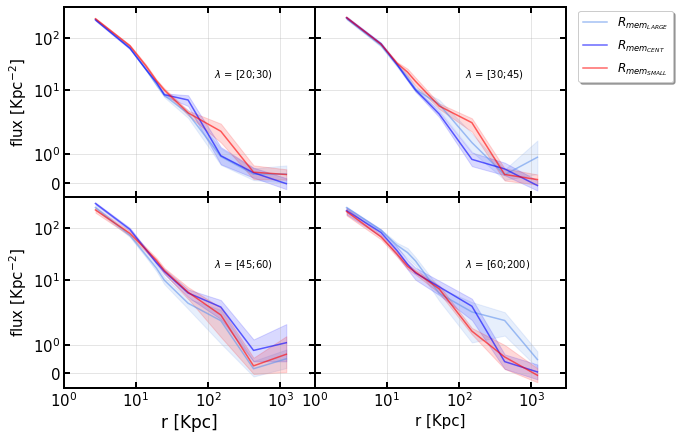

In [29]:

fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red1, mea_1, std1= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea1 = mea_1
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    
    jacknife_profile0=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea_0, std0= jacknife_profile0.T[0], jacknife_profile0.T[1], jacknife_profile0.T[2]

    mea0 = mea_0
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea_3, std3= jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]

    mea3 = mea_3
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$') #str_ngals[i]
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')

    plt.ylim(-0.5,400)
    plt.xlim(1, 3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)


    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)
    
    

plt.subplot(2,2,1)  
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=17) 
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)

plt.legend(bbox_to_anchor=(1.05, 1.98), loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


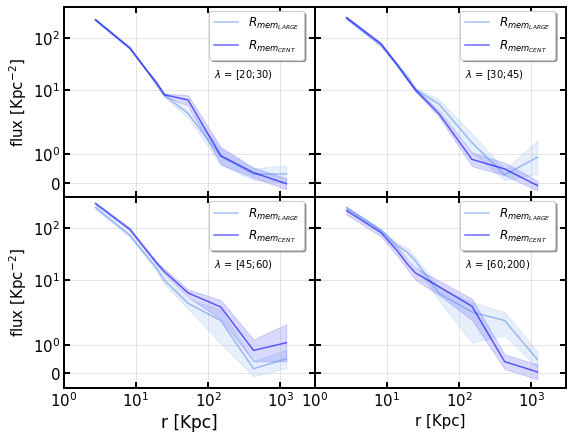

In [30]:

fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red1, mea_1, std1= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea1 = mea_1
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    
    jacknife_profile0=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea_0, std0= jacknife_profile0.T[0], jacknife_profile0.T[1], jacknife_profile0.T[2]

    mea0 = mea_0
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea_3, std3= jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]

    mea3 = mea_3
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea
    up = mea+std
    low = mea-std
    
    #plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$') #str_ngals[i]
    #plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')

    plt.ylim(-0.5,400)
    plt.xlim(1, 3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)

    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)
    
    

plt.subplot(2,2,1)  
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=17) 
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


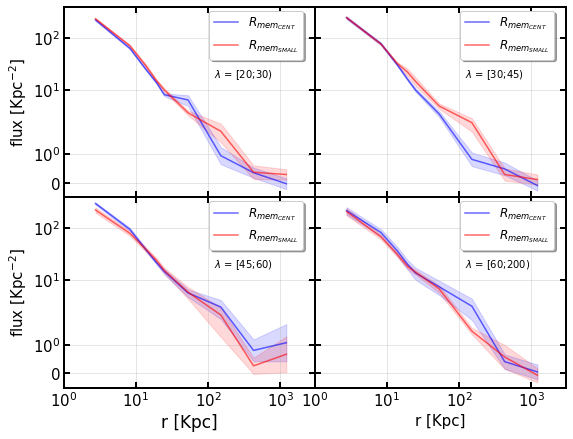

In [31]:

fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red1, mea_1, std1= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea1 = mea_1
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    
    jacknife_profile0=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea_0, std0= jacknife_profile0.T[0], jacknife_profile0.T[1], jacknife_profile0.T[2]

    mea0 = mea_0
    up0 = mea0+std0
    low0 = mea0-std0
    
    #plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    #plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea_3, std3= jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]

    mea3 = mea_3
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$') #str_ngals[i]
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')

    plt.ylim(-0.5,400)
    plt.xlim(1, 3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)

    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)
    
    

plt.subplot(2,2,1)  
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=17) 
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)

    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


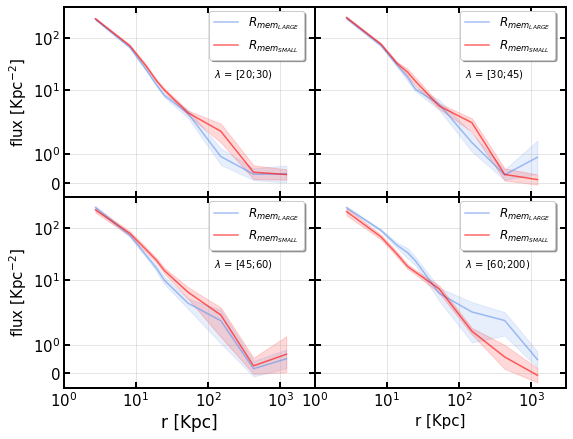

In [32]:

fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red1, mea_1, std1= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea1 = mea_1
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    
    jacknife_profile0=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea_0, std0= jacknife_profile0.T[0], jacknife_profile0.T[1], jacknife_profile0.T[2]

    mea0 = mea_0
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea_3, std3= jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]

    mea3 = mea_3
    up3 = mea3+std3
    low3 = mea3-std3
    
    #plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    #plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$') #str_ngals[i]
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')

    plt.ylim(-0.5,400)
    plt.xlim(1, 3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)

    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)
    
    

plt.subplot(2,2,1)  
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=17) 
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)


plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-pack

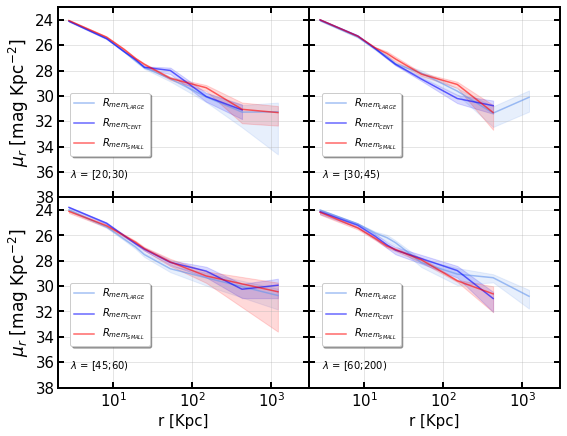

In [33]:


fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    

    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask], mag1[mask], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask], mag_up1[mask], mag_low1[mask], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    

    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask], mag0[mask], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask], mag_up0[mask], mag_low0[mask], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    

    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask], mag3[mask], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask], mag_up3[mask], mag_low3[mask], color='blue', alpha=0.15, label='')
    
    

    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color='red', alpha=0.15, label='')
    
    plt.ylim(38,23)
    plt.xlim(2,3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.05, 0.55), loc=2, fontsize=10,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.05,0.1),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-pack

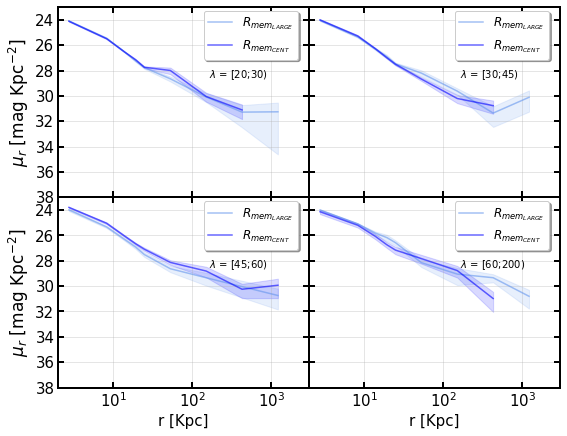

In [34]:


fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    

    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask], mag1[mask], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask], mag_up1[mask], mag_low1[mask], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    

    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask], mag0[mask], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask], mag_up0[mask], mag_low0[mask], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    

    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask], mag3[mask], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask], mag_up3[mask], mag_low3[mask], color='blue', alpha=0.15, label='')
    
    

    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    #plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    #plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color='red', alpha=0.15, label='')
    
    plt.ylim(38,23)
    plt.xlim(2,3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-pack

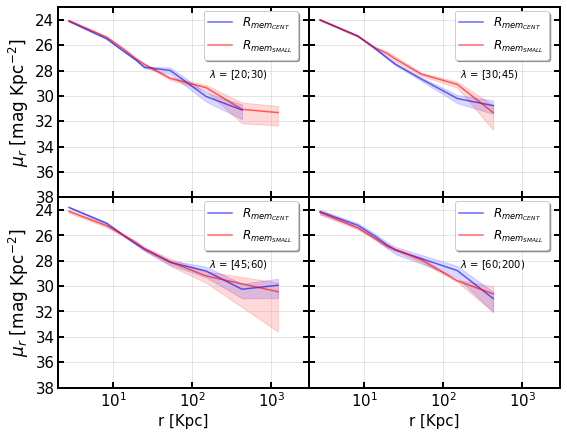

In [35]:


fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    

    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask], mag1[mask], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask], mag_up1[mask], mag_low1[mask], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    

    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    #plt.plot(r_red0[mask], mag0[mask], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    #plt.fill_between(r_red0[mask], mag_up0[mask], mag_low0[mask], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    

    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask], mag3[mask], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask], mag_up3[mask], mag_low3[mask], color='blue', alpha=0.15, label='')
    
    

    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color='red', alpha=0.15, label='')
    
    plt.ylim(38,23)
    plt.xlim(2,3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-pack

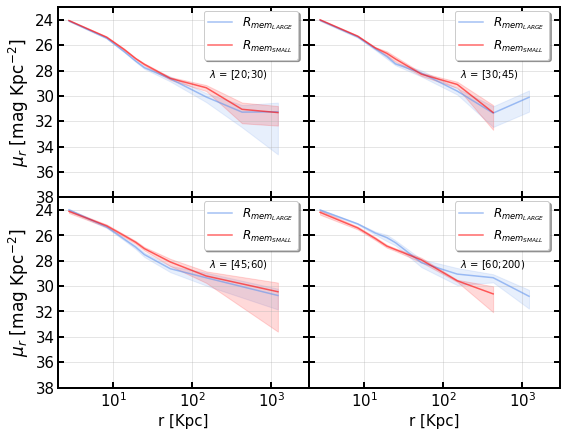

In [36]:


fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    

    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask], mag1[mask], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask], mag_up1[mask], mag_low1[mask], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    

    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask], mag0[mask], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask], mag_up0[mask], mag_low0[mask], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    

    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    #plt.plot(r_red3[mask], mag3[mask], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    #plt.fill_between(r_red3[mask], mag_up3[mask], mag_low3[mask], color='blue', alpha=0.15, label='')
    
    

    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color='red', alpha=0.15, label='')
    
    plt.ylim(38,23)
    plt.xlim(2,3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.63),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


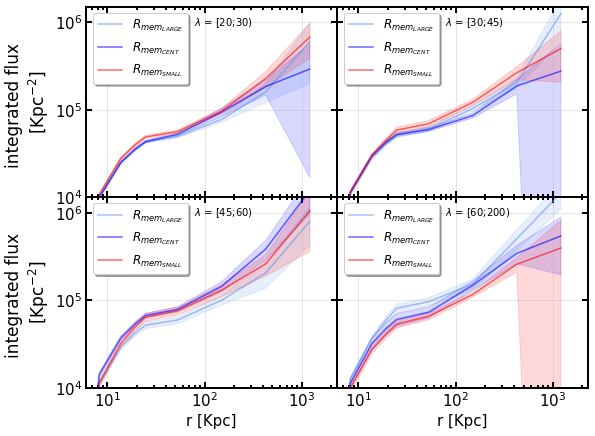

In [37]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')
    
    


    plt.xticks(fontsize = 0)
    plt.yscale('symlog')
    plt.xlim(6, 2.3e3)
    plt.ylim(1e4, 1.5e6)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


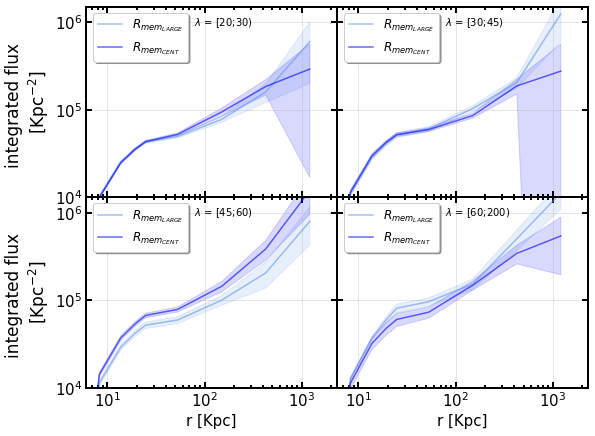

In [38]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    #plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    #plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')
    
    


    plt.xticks(fontsize = 0)
    plt.yscale('symlog')
    plt.xlim(6, 2.3e3)
    plt.ylim(1e4, 1.5e6)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


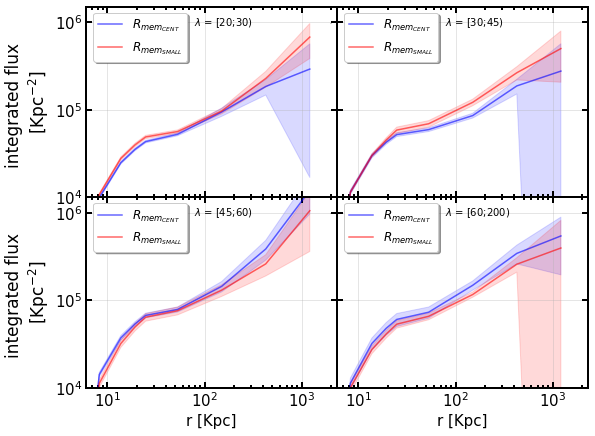

In [39]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    #plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    #plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')
    
    


    plt.xticks(fontsize = 0)
    plt.yscale('symlog')
    plt.xlim(6, 2.3e3)
    plt.ylim(1e4, 1.5e6)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


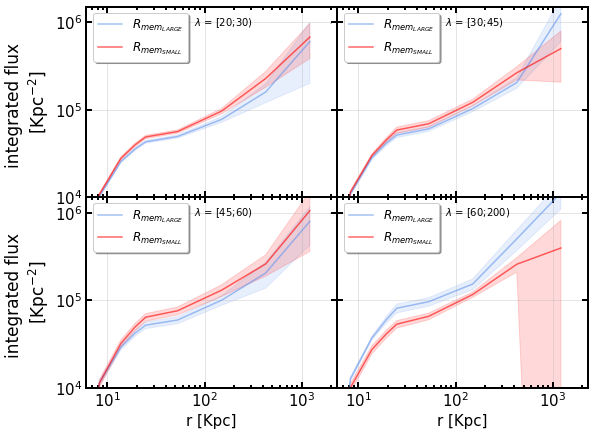

In [40]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;200)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    #plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1, up1, low1, color='grey', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, up0, low0, color='cornflowerblue', alpha=0.15, label='')
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    #plt.plot(r_red3, mea3, '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    #plt.fill_between(r_red3, up3, low3, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')
    
    


    plt.xticks(fontsize = 0)
    plt.yscale('symlog')
    plt.xlim(6, 2.3e3)
    plt.ylim(1e4, 1.5e6)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

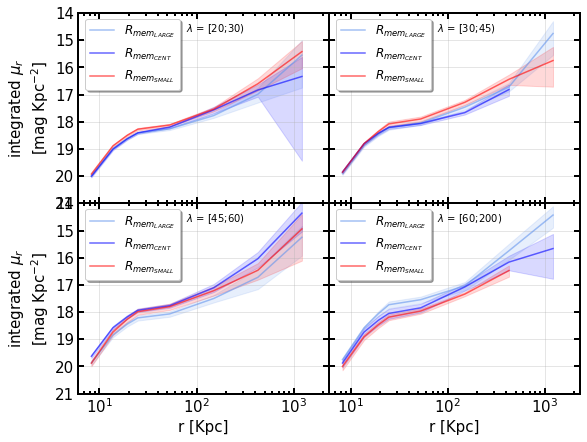

In [41]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask ], mag1[mask ], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask ], mag_up1[mask ], mag_low1[mask ], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask ], mag0[mask ], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask ], mag_up0[mask ], mag_low0[mask ], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask ], mag3[mask ], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask ], mag_up3[mask ], mag_low3[mask ], color='blue', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color='red', alpha=0.15, label='')


    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)


plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

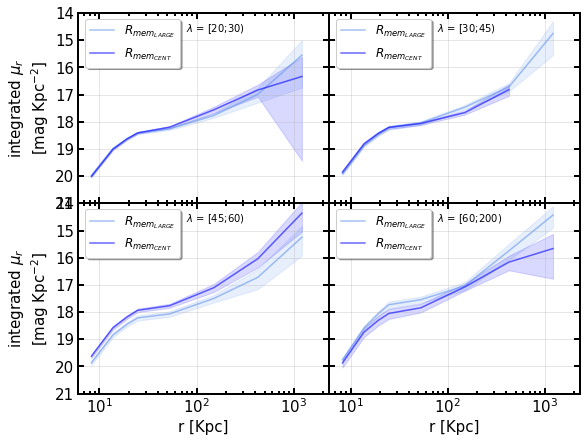

In [42]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask ], mag1[mask ], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask ], mag_up1[mask ], mag_low1[mask ], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask ], mag0[mask ], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask ], mag_up0[mask ], mag_low0[mask ], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask ], mag3[mask ], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask ], mag_up3[mask ], mag_low3[mask ], color='blue', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    #plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    #plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color='red', alpha=0.15, label='')


    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)


plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

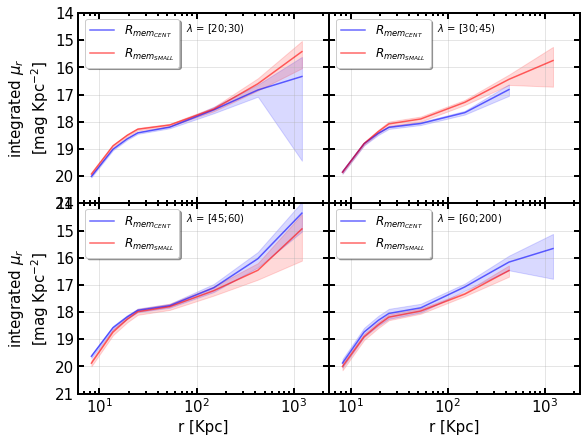

In [43]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask ], mag1[mask ], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask ], mag_up1[mask ], mag_low1[mask ], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    #plt.plot(r_red0[mask ], mag0[mask ], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    #plt.fill_between(r_red0[mask ], mag_up0[mask ], mag_low0[mask ], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    plt.plot(r_red3[mask ], mag3[mask ], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    plt.fill_between(r_red3[mask ], mag_up3[mask ], mag_low3[mask ], color='blue', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color='red', alpha=0.15, label='')


    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)


plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

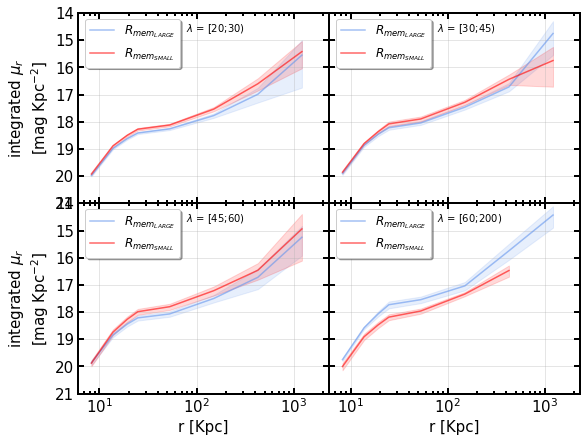

In [44]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    #plt.plot(r_red1[mask ], mag1[mask ], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask ], mag_up1[mask ], mag_low1[mask ], color='grey', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask ], mag0[mask ], '-', lw=1.5,alpha=0.6,color='cornflowerblue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0[mask ], mag_up0[mask ], mag_low0[mask ], color='cornflowerblue', alpha=0.15, label='')
    
    
    jacknife_profile3=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red3, mea3, std3 = jacknife_profile3.T[0], jacknife_profile3.T[1], jacknife_profile3.T[2]
    
    up3 = mea3+std3
    low3 = mea3-std3
    
    mag3 = 30 - 2.5 * np.log10(mea3)
    mag_up3 = 30 - 2.5 *np.log10(up3)
    mag_low3 = 30 - 2.5 * np.log10(low3)
    mask = (mag_low3>-30000)
    
    
    #plt.plot(r_red3[mask ], mag3[mask ], '-', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{CENT}}$')
    #plt.fill_between(r_red3[mask ], mag_up3[mask ], mag_low3[mask ], color='blue', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color='red', alpha=0.15, label='')


    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)


plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################